In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from env import get_connection

import warnings
warnings.filterwarnings("ignore")

### Acquire the data from SQL

In [2]:
# function to acquire zillow dataset

def get_zillow_data():

    '''
    This function is to get the zillow dataset from a local csv file or from SQL Ace to our working notebook to be able to
    use the data and perform various tasks using the data
    ''' 
    
    if os.path.isfile('zillow.csv'):
        
        return pd.read_csv('zillow.csv')
    
    else:
       
        url = get_connection('zillow')
        
        query = '''
        SELECT id, parcelid, bedroomcnt, bathroomcnt,
               calculatedfinishedsquarefeet, fips, 
               yearbuilt, taxamount, taxvaluedollarcnt 
        FROM properties_2017
        JOIN propertylandusetype USING(propertylandusetypeid)
        WHERE propertylandusetypeid = 261; 
        '''

        df = pd.read_sql(query, url)
        
        df.to_csv('zillow.csv', index = False)

        return df  

In [44]:
# calling function

df = get_zillow_data()

## Look at the data 

In [45]:
# first 5 rows of data

df.head()

,id,parcelid,bedrooms,bathrooms,sq_ft,fips,year_built,tax_amount,tax_value
0,20,11324547,4.0,2.0,3633.0,6037.0,2005.0,6941.39,296425.0
1,31,11544747,3.0,4.0,1620.0,6037.0,2011.0,10244.94,847770.0
2,33,11585547,3.0,2.0,2077.0,6037.0,1926.0,7924.68,646760.0
3,62,11954547,0.0,0.0,1200.0,6037.0,1972.0,91.60,5328.0
4,97,12537947,0.0,0.0,171.0,6037.0,1973.0,255.17,6920.0


In [8]:
# rows and columns

df.shape

(2152863, 9)

In [5]:
# dtypes, column names

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 9 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   id                            int64  
 1   parcelid                      int64  
 2   bedroomcnt                    float64
 3   bathroomcnt                   float64
 4   calculatedfinishedsquarefeet  float64
 5   fips                          float64
 6   yearbuilt                     float64
 7   taxamount                     float64
 8   taxvaluedollarcnt             float64
dtypes: float64(7), int64(2)
memory usage: 147.8 MB


In [9]:
# descriptive stats of dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2152863.0,1.490834e+06,8.608785e+05,1.00,745117.00,1490613.00,2235859.50,2.982282e+06
parcelid,2152863.0,1.309657e+07,5.171557e+06,10711725.00,11659067.50,12598515.00,14056085.50,1.696019e+08
bedroomcnt,2152852.0,3.287196e+00,9.547544e-01,0.00,3.00,3.00,4.00,2.500000e+01
bathroomcnt,2152852.0,2.230688e+00,9.992796e-01,0.00,2.00,2.00,3.00,3.200000e+01
calculatedfinishedsquarefeet,2144379.0,1.862855e+03,1.222125e+03,1.00,1257.00,1623.00,2208.00,9.525760e+05
fips,2152863.0,6.048377e+03,2.043329e+01,6037.00,6037.00,6037.00,6059.00,6.111000e+03
yearbuilt,2143526.0,1.960950e+03,2.216220e+01,1801.00,1949.00,1958.00,1976.00,2.016000e+03
taxamount,2148421.0,5.634866e+03,8.178910e+03,1.85,2534.98,4108.95,6414.32,1.337756e+06
taxvaluedollarcnt,2152370.0,4.618962e+05,6.996760e+05,1.00,188170.25,327671.00,534527.00,9.842891e+07


In [7]:
# null count per feature

df.isna().sum()

id                                 0
parcelid                           0
bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
fips                               0
yearbuilt                       9337
taxamount                       4442
taxvaluedollarcnt                493
dtype: int64

In [11]:
# a list of column names with nulls

df.columns[df.isnull().any()].to_list()

['bedroomcnt',
 'bathroomcnt',
 'calculatedfinishedsquarefeet',
 'yearbuilt',
 'taxamount',
 'taxvaluedollarcnt']

In [12]:
# number of columns

len(df.columns)

9

In [18]:
# a list of column names

df.columns.to_list()

['id',
 'parcelid',
 'bedroomcnt',
 'bathroomcnt',
 'calculatedfinishedsquarefeet',
 'fips',
 'yearbuilt',
 'taxamount',
 'taxvaluedollarcnt']

In [23]:
#renaming columns

df = df.rename(columns={'bedroomcnt':'bedrooms', 
                   'bathroomcnt':'bathrooms',
                   'calculatedfinishedsquarefeet':'sq_ft',
                   'yearbuilt':'year_built',
                   'taxamount':'tax_amount',
                   'taxvaluedollarcnt':'tax_value'})

df.head()

,id,parcelid,bedrooms,bathrooms,sq_ft,fips,year_built,tax_amount,tax_value
0,1,10759547,0.0,0.0,NaN,6037.0,NaN,NaN,27516.0
1,15,11193347,0.0,0.0,NaN,6037.0,NaN,NaN,10.0
2,16,11215747,0.0,0.0,NaN,6037.0,NaN,NaN,10.0
3,17,11229347,0.0,0.0,NaN,6037.0,NaN,174.21,2108.0
4,20,11324547,4.0,2.0,3633.0,6037.0,2005.0,6941.39,296425.0


## Visualizations of features

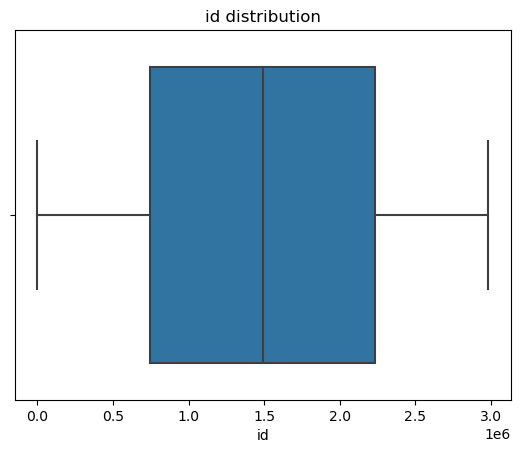

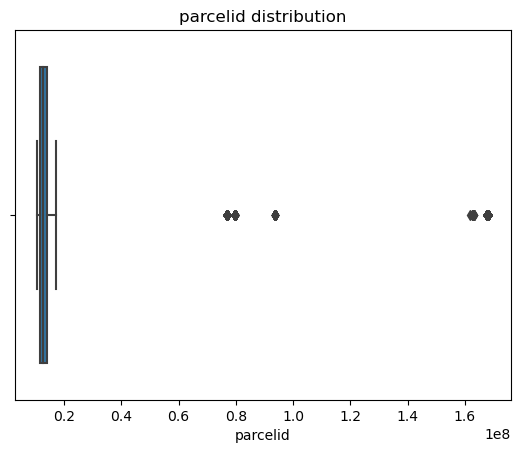

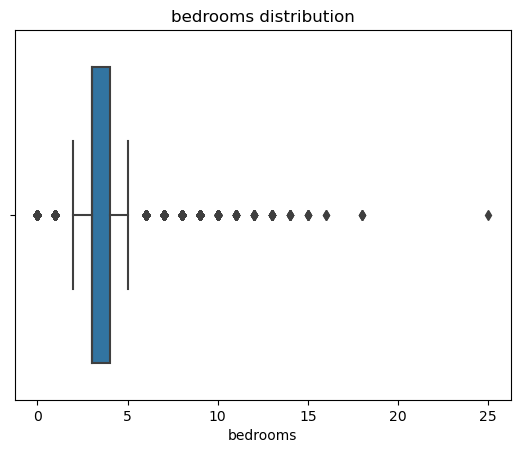

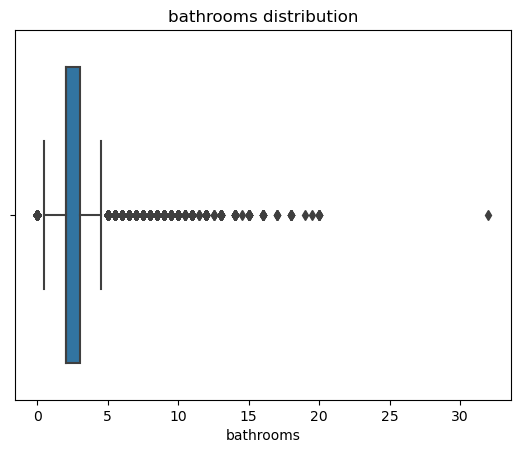

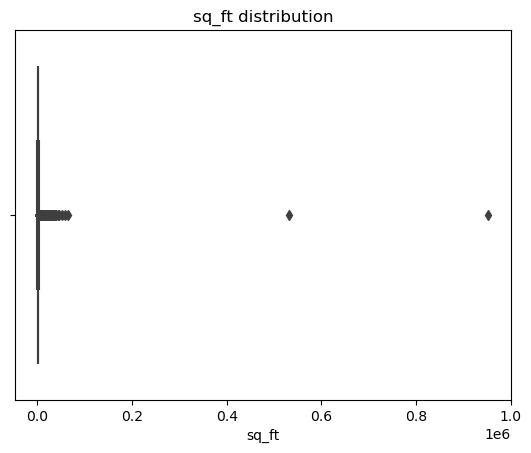

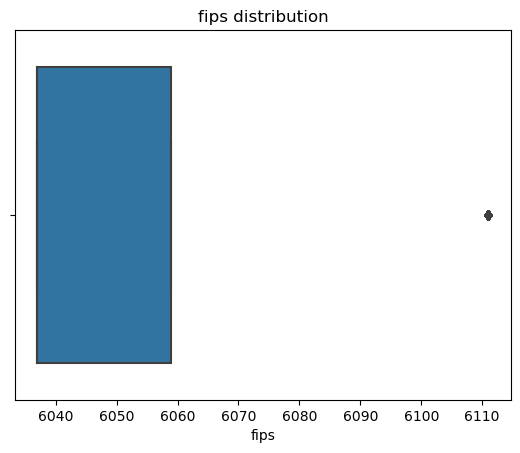

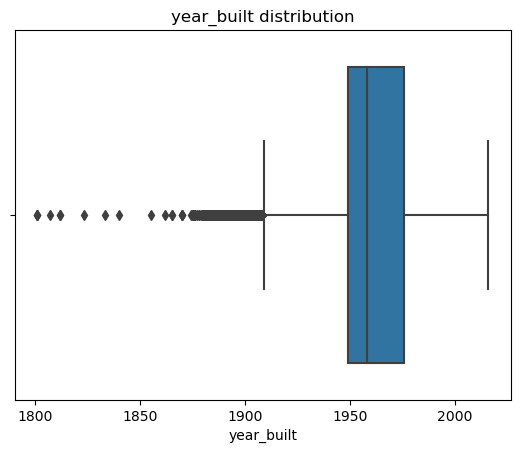

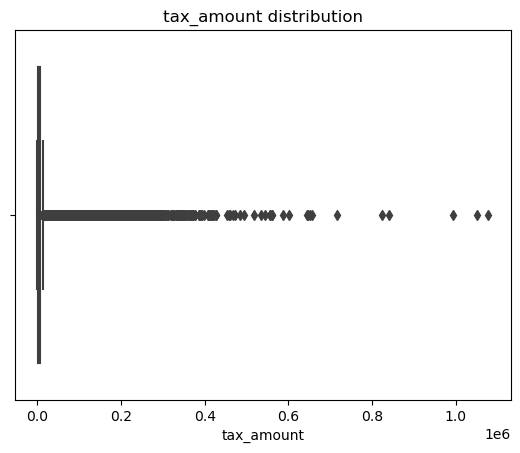

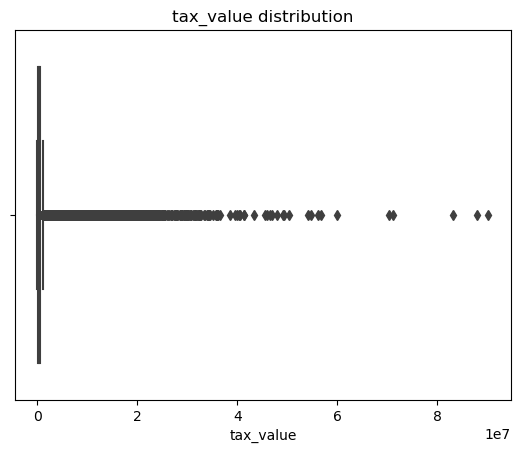

In [66]:
# made a boxplot for each feature
for col in df.columns:
    
    sns.boxplot(df[col])
    plt.title(f'{col} distribution')
    plt.show()

## Clean Zillow Dataset

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   id          int64  
 1   parcelid    int64  
 2   bedrooms    float64
 3   bathrooms   float64
 4   sq_ft       float64
 5   fips        float64
 6   year_built  float64
 7   tax_amount  float64
 8   tax_value   float64
dtypes: float64(7), int64(2)
memory usage: 147.8 MB


In [27]:
#drop nulls

df = df.dropna()
df

,id,parcelid,bedrooms,bathrooms,sq_ft,fips,year_built,tax_amount,tax_value
4,20,11324547,4.0,2.0,3633.0,6037.0,2005.0,6941.39,296425.0
6,31,11544747,3.0,4.0,1620.0,6037.0,2011.0,10244.94,847770.0
7,33,11585547,3.0,2.0,2077.0,6037.0,1926.0,7924.68,646760.0
11,62,11954547,0.0,0.0,1200.0,6037.0,1972.0,91.60,5328.0
14,97,12537947,0.0,0.0,171.0,6037.0,1973.0,255.17,6920.0
...,...,...,...,...,...,...,...,...,...
2152856,2982265,13027311,4.0,4.0,4375.0,6037.0,2015.0,13877.56,422400.0
2152858,2982268,14356230,4.0,3.0,2262.0,6059.0,2015.0,13494.52,960756.0
2152859,2982270,14157725,4.0,4.5,3127.0,6059.0,2014.0,6244.16,536061.0
2152861,2982275,14367624,3.0,2.5,1974.0,6059.0,2015.0,5302.70,424353.0


In [53]:
# amount of data that is left after dropping nulls

print(f'{(2140235/2152863)*100:.2f}%')

99.41%


## Create Functions 

In [31]:
# function to rename columns

def rename_columns(df):
    df = df.rename(columns={'bedroomcnt':'bedrooms', 
                   'bathroomcnt':'bathrooms',
                   'calculatedfinishedsquarefeet':'sq_ft',
                   'yearbuilt':'year_built',
                   'taxamount':'tax_amount',
                   'taxvaluedollarcnt':'tax_value'})
    return df

In [32]:
# function to clean up nulls

def clean_nulls(df):    

    df = df.dropna()
    
    return df

In [33]:
# function to get a clean zillow dataset

def clean_zillow_data(df):
    
    df = rename_columns(df)
    
    df = clean_nulls(df)    

    df.to_csv("zillow.csv", index=False)

    return df

In [42]:
# a function of acquiring and cleaning my zillow dataset

def wrangle_zillow():
   

    filename = "zillow.csv"

    if os.path.isfile(filename):
        df = pd.read_csv(filename)
    else:
        df = get_zillow_data()

        df = clean_zillow_data(df)

    return df

In [54]:
# calling our function of wrangled zillow dataset
wrangle_zillow()

,id,parcelid,bedrooms,bathrooms,sq_ft,fips,year_built,tax_amount,tax_value
0,20,11324547,4.0,2.0,3633.0,6037.0,2005.0,6941.39,296425.0
1,31,11544747,3.0,4.0,1620.0,6037.0,2011.0,10244.94,847770.0
2,33,11585547,3.0,2.0,2077.0,6037.0,1926.0,7924.68,646760.0
3,62,11954547,0.0,0.0,1200.0,6037.0,1972.0,91.60,5328.0
4,97,12537947,0.0,0.0,171.0,6037.0,1973.0,255.17,6920.0
...,...,...,...,...,...,...,...,...,...
2140230,2982265,13027311,4.0,4.0,4375.0,6037.0,2015.0,13877.56,422400.0
2140231,2982268,14356230,4.0,3.0,2262.0,6059.0,2015.0,13494.52,960756.0
2140232,2982270,14157725,4.0,4.5,3127.0,6059.0,2014.0,6244.16,536061.0
2140233,2982275,14367624,3.0,2.5,1974.0,6059.0,2015.0,5302.70,424353.0
